# Loading the Dataset

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('merged_racing_results.csv')

# Display the first few rows of the dataframe
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,Date,Race Number,Pla.,Horse No.,Horse,Jockey,Trainer,Act. Wt.,Declar. Horse Wt.,Dr.,LBW,RunningPosition,Finish Time,Win Odds
0,2023-11-29,1,1,8.0,HAPPY HORSE(H061),Y L Chung,K L Man,117,1100,3,-,111,0:57.60,5.3
1,2023-11-29,1,2,6.0,GOODMANSHIP(E208),L Ferraris,D J Whyte,123,1165,4,3/4,632,0:57.71,9.6
2,2023-11-29,1,3,9.0,FIGHTING STAR(E255),K Teetan,C H Yip,120,1085,5,1-3/4,993,0:57.87,3.1
3,2023-11-29,1,4,3.0,STRIVE FOR GLORY(D186),Z Purton,W Y So,129,1113,7,2-1/4,224,0:57.96,5.3
4,2023-11-29,1,5,7.0,HAPPILY FRIENDS(C533),J McDonald,W Y So,122,1107,6,2-1/4,565,0:57.96,8


# Understanding the Data

In [2]:
df.describe()

,Race Number,Horse No.,Act. Wt.
count,2005.000000,1994.000000,2005.000000
mean,4.917207,6.293380,125.152120
std,2.515447,3.382711,5.857788
min,1.000000,1.000000,110.000000
25%,3.000000,3.000000,120.000000
50%,5.000000,6.000000,125.000000
75%,7.000000,9.000000,130.000000
max,9.000000,12.000000,135.000000


In [3]:
# Display the data types of each feature
print("\nData types of each column:")
print(df.dtypes)


Data types of each column:
Date                  object
Race Number            int64
Pla.                  object
Horse No.            float64
Horse                 object
Jockey                object
Trainer               object
Act. Wt.               int64
Declar. Horse Wt.     object
Dr.                   object
LBW                   object
RunningPosition       object
Finish Time           object
Win Odds              object
dtype: object


In [4]:
# Summary statistics for numerical features
print("\nSummary statistics for numerical features:")
print(df.describe())


Summary statistics for numerical features:
       Race Number    Horse No.     Act. Wt.
count  2005.000000  1994.000000  2005.000000
mean      4.917207     6.293380   125.152120
std       2.515447     3.382711     5.857788
min       1.000000     1.000000   110.000000
25%       3.000000     3.000000   120.000000
50%       5.000000     6.000000   125.000000
75%       7.000000     9.000000   130.000000
max       9.000000    12.000000   135.000000


In [5]:
# Count of unique values in each categorical column
print("\nCount of unique values in categorical columns:")
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"Unique values in column {col}:")
    print(df[col].value_counts())
    print("\n")


Count of unique values in categorical columns:
Unique values in column Date:
Date
2024-03-27    111
2024-03-20    108
2024-01-31    108
2023-12-06    108
2024-02-15    107
2024-02-07    107
2023-12-13    106
2024-04-17    104
2024-04-10    103
2024-02-28    102
2024-03-13    101
2024-04-24    100
2024-02-21    100
2024-03-06     99
2024-01-17     95
2023-12-29     92
2024-01-10     91
2024-01-04     89
2023-12-20     88
2023-11-29     86
Name: count, dtype: int64


Unique values in column Pla.:
Pla.
1       174
5       174
6       174
7       174
4       173
2       172
3       171
8       171
9       164
10      155
11      146
12      117
WV       22
WV-A      4
2 DH      4
WX        3
8 DH      2
3 DH      2
UR        1
TNP       1
DNF       1
Name: count, dtype: int64


Unique values in column Horse:
Horse
SUPER EAGLE(G408)      10
VIVA A LA(G282)         9
COLONEL(D090)           9
HOSS(H055)              9
HERCULES(C476)          8
                       ..
DAN ATTACK (H317)    

## Dropping Redundant Columns

### Dropping 'Horse No' Column


In [6]:
# Drop the 'Horse No.' column from the DataFrame
df = df.drop(columns=['Horse No.'])

### Dropping 'RunningPosition' Column

In [7]:
# Drop the 'RunningPosition' column from the DataFrame
df = df.drop(columns=['RunningPosition'])

### Dropping 'LBW' Column

In [8]:
# Drop the 'LBW' column from the DataFrame
df = df.drop(columns=['LBW'])

In [9]:
# Confirm the column is dropped
df.head()

,Date,Race Number,Pla.,Horse,Jockey,Trainer,Act. Wt.,Declar. Horse Wt.,Dr.,Finish Time,Win Odds
0,2023-11-29,1,1,HAPPY HORSE(H061),Y L Chung,K L Man,117,1100,3,0:57.60,5.3
1,2023-11-29,1,2,GOODMANSHIP(E208),L Ferraris,D J Whyte,123,1165,4,0:57.71,9.6
2,2023-11-29,1,3,FIGHTING STAR(E255),K Teetan,C H Yip,120,1085,5,0:57.87,3.1
3,2023-11-29,1,4,STRIVE FOR GLORY(D186),Z Purton,W Y So,129,1113,7,0:57.96,5.3
4,2023-11-29,1,5,HAPPILY FRIENDS(C533),J McDonald,W Y So,122,1107,6,0:57.96,8


### Removing Missing Values via Placeholders

In [10]:
# Define placeholders
placeholders = ["---"]

# Check for placeholders in the entire DataFrame
for placeholder in placeholders:
    mask = df.apply(lambda x: x.astype(str).str.contains(placeholder)).any(axis=1)
    if mask.any():
        print(f"Entries with the placeholder '{placeholder}':")
        display(df[mask])

Entries with the placeholder '---':


,Date,Race Number,Pla.,Horse,Jockey,Trainer,Act. Wt.,Declar. Horse Wt.,Dr.,Finish Time,Win Odds
85,2023-11-29,8,WV,REWARD SMILE(H256),A Badel,J Size,121,---,---,---,---
250,2023-12-13,5,WV,HUMBLE STAR(H125),Z Purton,P C Ng,135,---,---,---,---
287,2023-12-13,8,WV,THESIS(H111),A Badel,F C Lor,120,---,---,---,---
488,2024-01-04,1,WV,LADY BILLIE(H365),A Badel,W K Mo,118,---,---,---,---
534,2024-01-04,5,WV,YEE CHEONG SPIRIT(H379),K C Leung,C S Shum,129,---,---,---,---
647,2024-01-10,7,WV,S J TOURBILLON(G138),H Bentley,D J Whyte,120,---,---,---,---
671,2024-01-17,1,WX,AI ONE(E139),L Ferraris,K H Ting,133,---,---,---,---
672,2024-01-17,1,WV,M M NEBULA(G279),Z Purton,P C Ng,133,---,---,---,---
684,2024-01-17,2,WX,CONCERTO(E176),L Ferraris,K H Ting,127,---,---,---,---
730,2024-01-17,6,WX,ALLOY KING(D287),M F Poon,K H Ting,113,---,---,---,---


In [11]:
# Identify rows with placeholders and drop them
for placeholder in placeholders:
    mask = df.apply(lambda x: x.astype(str).str.contains(placeholder))
    df = df[~mask.any(axis=1)]

# Check the DataFrame after dropping rows
print("DataFrame after dropping rows with placeholders:")
df

DataFrame after dropping rows with placeholders:


,Date,Race Number,Pla.,Horse,Jockey,Trainer,Act. Wt.,Declar. Horse Wt.,Dr.,Finish Time,Win Odds
0,2023-11-29,1,1,HAPPY HORSE(H061),Y L Chung,K L Man,117,1100,3,0:57.60,5.3
1,2023-11-29,1,2,GOODMANSHIP(E208),L Ferraris,D J Whyte,123,1165,4,0:57.71,9.6
2,2023-11-29,1,3,FIGHTING STAR(E255),K Teetan,C H Yip,120,1085,5,0:57.87,3.1
3,2023-11-29,1,4,STRIVE FOR GLORY(D186),Z Purton,W Y So,129,1113,7,0:57.96,5.3
4,2023-11-29,1,5,HAPPILY FRIENDS(C533),J McDonald,W Y So,122,1107,6,0:57.96,8
...,...,...,...,...,...,...,...,...,...,...,...
2000,2024-04-24,9,8,DEVILDOM(H445),L Hewitson,T P Yung,123,1069,3,1:51.13,9.5
2001,2024-04-24,9,9,AFFORDABLE(J242),B Thompson,D A Hayes,119,1241,8,1:51.38,66
2002,2024-04-24,9,10,EIGHTEEN PALMS(H033),A Badel,C S Shum,125,1214,5,1:51.43,8
2003,2024-04-24,9,11,TRADITION(J111),M F Poon,P C Ng,115,1022,4,1:51.64,85


In [12]:
# Check for missing values
print("\nChecking for missing values:")
print(df.isnull().sum())


Checking for missing values:
Date                 0
Race Number          0
Pla.                 0
Horse                0
Jockey               0
Trainer              0
Act. Wt.             0
Declar. Horse Wt.    0
Dr.                  0
Finish Time          0
Win Odds             0
dtype: int64


## Standardizing and Converting Values

In [13]:
import pandas as pd

# Function to convert time string to seconds
def convert_time_to_seconds(time_str):
    try:
        # Check if the time_str is a string and has the expected ':' character
        if isinstance(time_str, str) and ':' in time_str:
            # Split the string on ':' to get minutes and seconds
            minutes, seconds = time_str.split(':')
            # The seconds part may have a fractional part (milliseconds), ensure it is captured
            if '.' in seconds:
                seconds, milliseconds = seconds.split('.')
                milliseconds = int(milliseconds) / (10**len(milliseconds))  # Adjust for the number of digits
            else:
                milliseconds = 0
            total_seconds = int(minutes) * 60 + int(seconds) + milliseconds
            return total_seconds
        else:
            return None  # Handle non-string or incorrectly formatted strings
    except ValueError:
        # Catch any conversion errors and return None
        return None

#'Finish Time'column converting
df['Finish Time'] = df['Finish Time'].apply(convert_time_to_seconds)

# After conversion, check to ensure conversion has worked
df

,Date,Race Number,Pla.,Horse,Jockey,Trainer,Act. Wt.,Declar. Horse Wt.,Dr.,Finish Time,Win Odds
0,2023-11-29,1,1,HAPPY HORSE(H061),Y L Chung,K L Man,117,1100,3,57.60,5.3
1,2023-11-29,1,2,GOODMANSHIP(E208),L Ferraris,D J Whyte,123,1165,4,57.71,9.6
2,2023-11-29,1,3,FIGHTING STAR(E255),K Teetan,C H Yip,120,1085,5,57.87,3.1
3,2023-11-29,1,4,STRIVE FOR GLORY(D186),Z Purton,W Y So,129,1113,7,57.96,5.3
4,2023-11-29,1,5,HAPPILY FRIENDS(C533),J McDonald,W Y So,122,1107,6,57.96,8
...,...,...,...,...,...,...,...,...,...,...,...
2000,2024-04-24,9,8,DEVILDOM(H445),L Hewitson,T P Yung,123,1069,3,111.13,9.5
2001,2024-04-24,9,9,AFFORDABLE(J242),B Thompson,D A Hayes,119,1241,8,111.38,66
2002,2024-04-24,9,10,EIGHTEEN PALMS(H033),A Badel,C S Shum,125,1214,5,111.43,8
2003,2024-04-24,9,11,TRADITION(J111),M F Poon,P C Ng,115,1022,4,111.64,85


In [14]:
import pandas as pd

# Checking for rows with null values after the conversion
null_values = df[['Act. Wt.', 'Declar. Horse Wt.', 'Finish Time', 'Win Odds']].isnull()

print("Null or incorrectly formatted values:")
print(null_values.any(axis=1).sum())

# Display rows with null or incorrectly formatted values
incorrect_entries = df[null_values.any(axis=1)]
print(incorrect_entries)

Null or incorrectly formatted values:
0
Empty DataFrame
Columns: [Date, Race Number, Pla., Horse, Jockey, Trainer, Act. Wt., Declar. Horse Wt., Dr., Finish Time, Win Odds]
Index: []


In [15]:
# Check for missing values in the specified columns
missing_values = df[['Act. Wt.', 'Declar. Horse Wt.', 'Finish Time', 'Win Odds']].isnull()

# Display the number of missing values for each column
print("Missing values for each column:")
print(missing_values.sum())

Missing values for each column:
Act. Wt.             0
Declar. Horse Wt.    0
Finish Time          0
Win Odds             0
dtype: int64


In [16]:
# Convert the 'Declar. Horse Wt.' column to numeric, marking non-convertible entries as NaN
df['Declar. Horse Wt.'] = pd.to_numeric(df['Declar. Horse Wt.'], errors='coerce')

# Check for rows where 'Declar. Horse Wt.' is NaN to identify failed conversions
failed_conversions = df[df['Declar. Horse Wt.'].isna()]

# Display rows with failed conversions
print(failed_conversions)


Empty DataFrame
Columns: [Date, Race Number, Pla., Horse, Jockey, Trainer, Act. Wt., Declar. Horse Wt., Dr., Finish Time, Win Odds]
Index: []


In [17]:
# Converting Dead Heat (DH) values to integers in 'Place' column

# Function to clean and convert the 'Place' column
def clean_place(value):
    if 'DH' in value:
        # Extract the number part before "DH"
        return int(value.split(' ')[0])
    return int(value)

# Apply the function to the 'Place' column
df['Pla.'] = df['Pla.'].apply(clean_place)

# Check the transformation
print(df['Pla.'].head())

0    1
1    2
2    3
3    4
4    5
Name: Pla., dtype: int64


In [18]:
# Extracting date components (year, month, day) as seperate features

# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract year, month, and day from the 'Date' column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Drop the original 'Date' column as no longer needed
df.drop('Date', axis=1, inplace=True)

# Display the first few rows to verify the new columns
df.head()

,Race Number,Pla.,Horse,Jockey,Trainer,Act. Wt.,Declar. Horse Wt.,Dr.,Finish Time,Win Odds,Year,Month,Day
0,1,1,HAPPY HORSE(H061),Y L Chung,K L Man,117,1100,3,57.60,5.3,2023,11,29
1,1,2,GOODMANSHIP(E208),L Ferraris,D J Whyte,123,1165,4,57.71,9.6,2023,11,29
2,1,3,FIGHTING STAR(E255),K Teetan,C H Yip,120,1085,5,57.87,3.1,2023,11,29
3,1,4,STRIVE FOR GLORY(D186),Z Purton,W Y So,129,1113,7,57.96,5.3,2023,11,29
4,1,5,HAPPILY FRIENDS(C533),J McDonald,W Y So,122,1107,6,57.96,8,2023,11,29


## Understanding Relationships

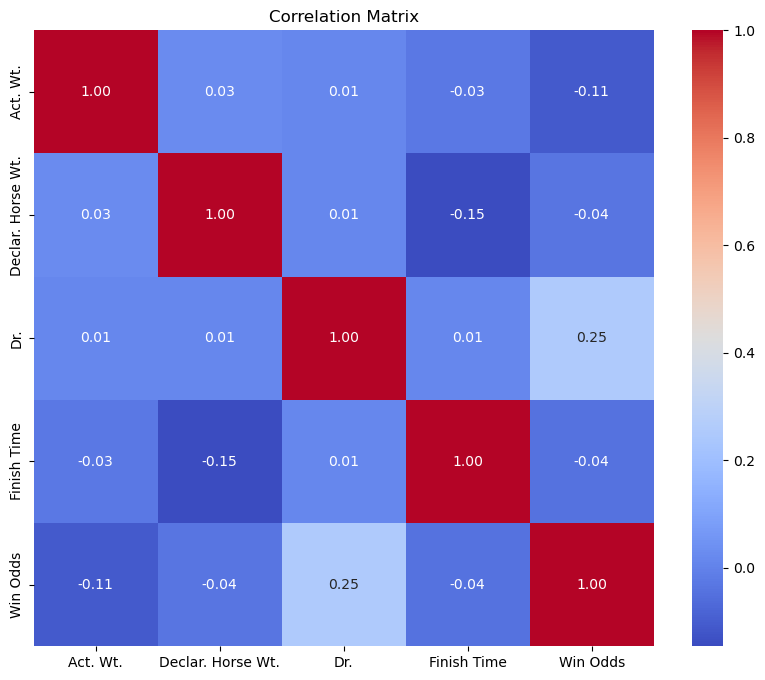

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
correlation = df[['Act. Wt.', 'Declar. Horse Wt.', 'Dr.', 'Finish Time', 'Win Odds']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## Identifying and Correcting Outliers

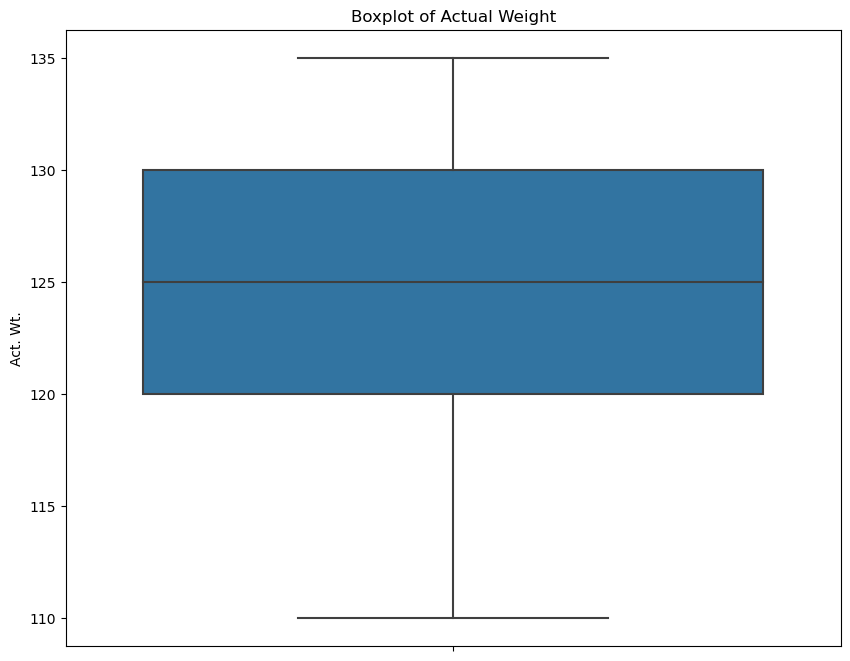

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot for the Actual Weight
plt.figure(figsize=(10, 8))  # Adjust the size as needed
sns.boxplot(y=df['Act. Wt.'])
plt.title('Boxplot of Actual Weight')
plt.show()


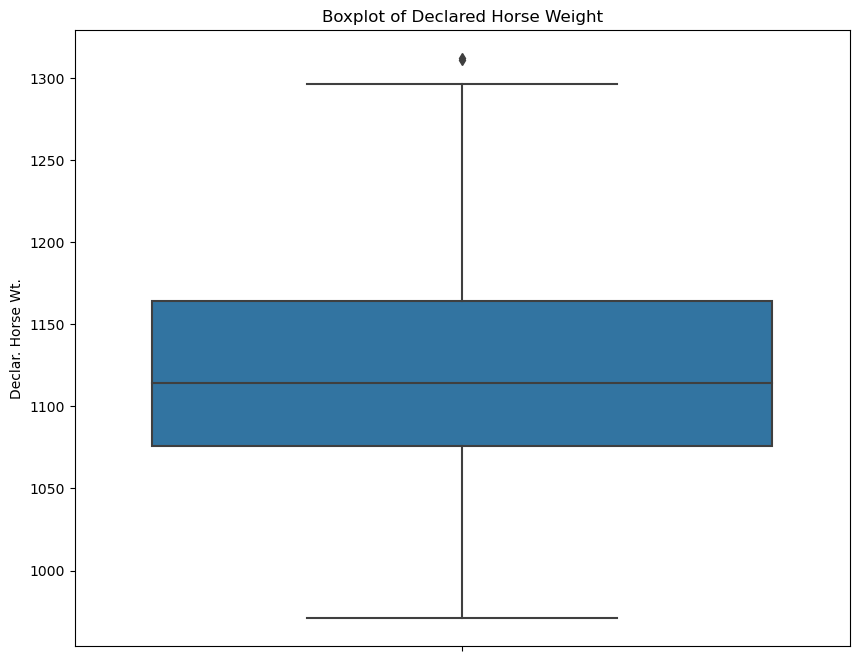

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot for the Declared Horse Weight
plt.figure(figsize=(10, 8))  # Adjust the size as needed
sns.boxplot(y=df['Declar. Horse Wt.'])
plt.title('Boxplot of Declared Horse Weight')
plt.show()


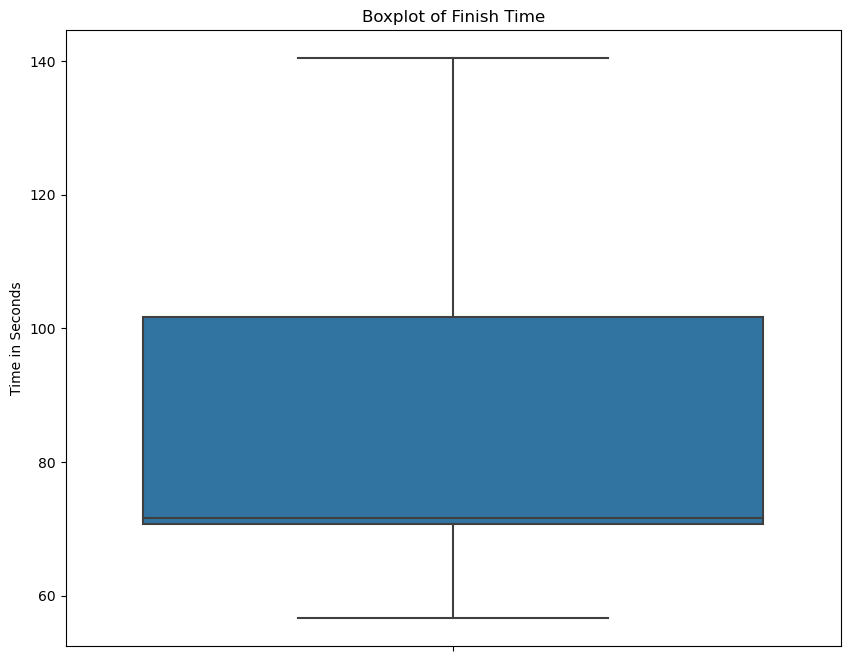

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot for the Finish Time
plt.figure(figsize=(10, 8))  # Adjust the size as needed
sns.boxplot(y=df['Finish Time'])
plt.title('Boxplot of Finish Time')
plt.ylabel('Time in Seconds')
plt.show()


In [23]:
# Calculate Q1 (25th percentile), Q3 (75th percentile), and IQR for 'Declar. Horse Wt.'
Q1_declared = df['Declar. Horse Wt.'].quantile(0.25)
Q3_declared = df['Declar. Horse Wt.'].quantile(0.75)
IQR_declared = Q3_declared - Q1_declared

# Define outliers for declared horse weight
outliers_declared = df[(df['Declar. Horse Wt.'] < (Q1_declared - 1.5 * IQR_declared)) |
                       (df['Declar. Horse Wt.'] > (Q3_declared + 1.5 * IQR_declared))]

# Display the outliers
print("Outliers in the 'Declared Horse Weight' column:")
print(outliers_declared[['Race Number', 'Horse', 'Declar. Horse Wt.']])


Outliers in the 'Declared Horse Weight' column:
     Race Number                Horse  Declar. Horse Wt.
155            6     SIGHT HERO(D487)               1312
564            8  MAJESTIC STAR(E203)               1311


In [24]:
# List of specific string values to search for Special Incidents Index
search_values = ["DISQ", "DNF", "FE", "ML", "PU", "TNP", "TO", "UR", "VOID", 
                 "WR", "WV", "WV-A", "WX", "WX-A", "WXNR"]

# Create a boolean DataFrame where True represents the presence of the search value
mask = df.apply(lambda x: x.astype(str).isin(search_values))

# Any row with at least one True value will be flagged
rows_with_values = df[mask.any(axis=1)]

# Display rows with the specified values
print(rows_with_values)

Empty DataFrame
Columns: [Race Number, Pla., Horse, Jockey, Trainer, Act. Wt., Declar. Horse Wt., Dr., Finish Time, Win Odds, Year, Month, Day]
Index: []


## Renaming Columns

In [25]:
# Renaming columns to be more consistent
new_column_names = {
    'Pla.': 'Place',
    'Race Number': 'Race_Number',
    'Act. Wt.': 'Actual_Weight',
    'Declar. Horse Wt.': 'Declared_Horse_Weight',
    'Dr.': 'Draw_Position',
    'Finish Time': 'Finish_Time',
    'Win Odds': 'Win_Odds'
}

df.rename(columns=new_column_names, inplace=True)

df.to_csv('semi_cleaned_dataset.csv', index=False)

print("The dataset has been saved as 'semi_cleaned_dataset.csv'.")

# Display the transformed DataFrame
df.head()

The dataset has been saved as 'semi_cleaned_dataset.csv'.


,Race_Number,Place,Horse,Jockey,Trainer,Actual_Weight,Declared_Horse_Weight,Draw_Position,Finish_Time,Win_Odds,Year,Month,Day
0,1,1,HAPPY HORSE(H061),Y L Chung,K L Man,117,1100,3,57.60,5.3,2023,11,29
1,1,2,GOODMANSHIP(E208),L Ferraris,D J Whyte,123,1165,4,57.71,9.6,2023,11,29
2,1,3,FIGHTING STAR(E255),K Teetan,C H Yip,120,1085,5,57.87,3.1,2023,11,29
3,1,4,STRIVE FOR GLORY(D186),Z Purton,W Y So,129,1113,7,57.96,5.3,2023,11,29
4,1,5,HAPPILY FRIENDS(C533),J McDonald,W Y So,122,1107,6,57.96,8,2023,11,29


## One-Hot Encoding

In [26]:
import pandas as pd

# Get unique entries for 'Horse'
unique_horses = df['Horse'].unique()
print("Unique horses:", unique_horses)

# Get unique entries for 'Jockey'
unique_jockeys = df['Jockey'].unique()
print("Unique jockeys:", unique_jockeys)

# Get unique entries for 'Trainer'
unique_trainers = df['Trainer'].unique()
print("Unique trainers:", unique_trainers)

Unique horses: ['HAPPY HORSE(H061)' 'GOODMANSHIP(E208)' 'FIGHTING STAR(E255)'
 'STRIVE FOR GLORY(D186)' 'HAPPILY FRIENDS(C533)' 'GREAT DAYS(H119)'
 'DASHING GLORY(G397)' 'EIGHT TRIGRAMS(C102)' 'MULTIMORE(D443)'
 'HUMBLE STAR(H125)' 'GRATEFUL HEART(D278)' 'HEROIC MASTER(G394)'
 'EXPLOSIVE WITNESS(B001)' 'E UNIVERSE(H151)' 'JOLLY RULER(E346)'
 'CALIFORNIA DEEPLY(G451)' 'YOUTH POWER(H358)' 'WONDER YEARS(G001)'
 'JUBILATION(G029)' 'SUPER HONG KONG(D241)' 'AI ONE(E139)'
 'FLYING SILVER(E478)' 'KASA PAPA(G312)' 'VINCY(B213)' 'DARCI JOY(E161)'
 'MANAGEMENT FOLKS(E496)' 'SUNNY BABY(E166)' 'KYRUS UNICORN(D267)'
 'TURTLE AGAIN(H083)' 'GOLD STERLING(H032)' 'DIAMOND WINNER(H285)'
 'COLOURFUL BARON(G301)' 'JOYFUL CHAMPION(G072)' 'VIVA A LA(G282)'
 'HAPPY HERO(G322)' 'FORTUNE TRIPLE(D274)' 'GOLDEN FAIRY(E448)'
 'TRAVEL GUIDE(H182)' 'MIGHTY STAR(G117)' 'SUN OF MAKFI(D157)'
 'ACT OF FAITH(H082)' 'KOKUSHI MUSOU(G006)' 'EASY SNIP(G211)'
 'E BROTHER(E266)' 'TALENTS SUPREMO(H133)' 'RUBYLOT(H412)'
 'TACTIC

### One-Hot Encoding 'Horse', 'Jockey' and 'Trainer' Columns

In [27]:
import pandas as pd

# Perform one-hot encoding on the 'Horse', 'Jockey', and 'Trainer' columns
df_encoded = pd.get_dummies(df, columns=['Horse', 'Jockey', 'Trainer'])

# Convert only the one-hot encoded columns to integers (0s and 1s)
encoded_cols = df_encoded.columns.difference(df.columns).tolist()  # get the new one-hot encoded columns
df_encoded[encoded_cols] = df_encoded[encoded_cols].astype(int)

# Save the encoded DataFrame to a new CSV file
df_encoded.to_csv('encoded_dataset.csv', index=False)

# To make sure everything went well
print("Encoding completed, and the encoded dataset with horses is saved as 'encoded_dataset_with_horses.csv'.")


Encoding completed, and the encoded dataset with horses is saved as 'encoded_dataset_with_horses.csv'.


In [28]:
# View the encoded dataset
df_encoded

,Race_Number,Place,Actual_Weight,Declared_Horse_Weight,Draw_Position,Finish_Time,Win_Odds,Year,Month,Day,...,Trainer_K H Ting,Trainer_K L Man,Trainer_K W Lui,Trainer_M Newnham,Trainer_P C Ng,Trainer_P F Yiu,Trainer_T P Yung,Trainer_W K Mo,Trainer_W Y So,Trainer_Y S Tsui
0,1,1,117,1100,3,57.60,5.3,2023,11,29,...,0,1,0,0,0,0,0,0,0,0
1,1,2,123,1165,4,57.71,9.6,2023,11,29,...,0,0,0,0,0,0,0,0,0,0
2,1,3,120,1085,5,57.87,3.1,2023,11,29,...,0,0,0,0,0,0,0,0,0,0
3,1,4,129,1113,7,57.96,5.3,2023,11,29,...,0,0,0,0,0,0,0,0,1,0
4,1,5,122,1107,6,57.96,8,2023,11,29,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000,9,8,123,1069,3,111.13,9.5,2024,4,24,...,0,0,0,0,0,0,1,0,0,0
2001,9,9,119,1241,8,111.38,66,2024,4,24,...,0,0,0,0,0,0,0,0,0,0
2002,9,10,125,1214,5,111.43,8,2024,4,24,...,0,0,0,0,0,0,0,0,0,0
2003,9,11,115,1022,4,111.64,85,2024,4,24,...,0,0,0,0,1,0,0,0,0,0


# Exploratory Data Analysis

In [29]:
import pandas as pd

# Load the dataset
df = pd.read_csv('encoded_dataset.csv')

# Now you can generate descriptive statistics and display the dataset information
descriptive_stats = df.describe()

# Display statistics for numerical features
print(descriptive_stats)

# Display information about the dataset
print(df.info())

       Race_Number        Place  Actual_Weight  Declared_Horse_Weight  \
count  1973.000000  1973.000000    1973.000000            1973.000000   
mean      4.918398     6.228586     125.163710            1120.585910   
std       2.511824     3.352961       5.854824              61.454986   
min       1.000000     1.000000     110.000000             971.000000   
25%       3.000000     3.000000     120.000000            1076.000000   
50%       5.000000     6.000000     125.000000            1114.000000   
75%       7.000000     9.000000     130.000000            1164.000000   
max       9.000000    12.000000     135.000000            1312.000000   

       Draw_Position  Finish_Time     Win_Odds         Year        Month  \
count    1973.000000  1973.000000  1973.000000  1973.000000  1973.000000   
mean        6.253928    85.349681    21.390117  2023.758236     4.701977   
std         3.363974    20.635215    24.784002     0.428260     4.132734   
min         1.000000    56.620000     

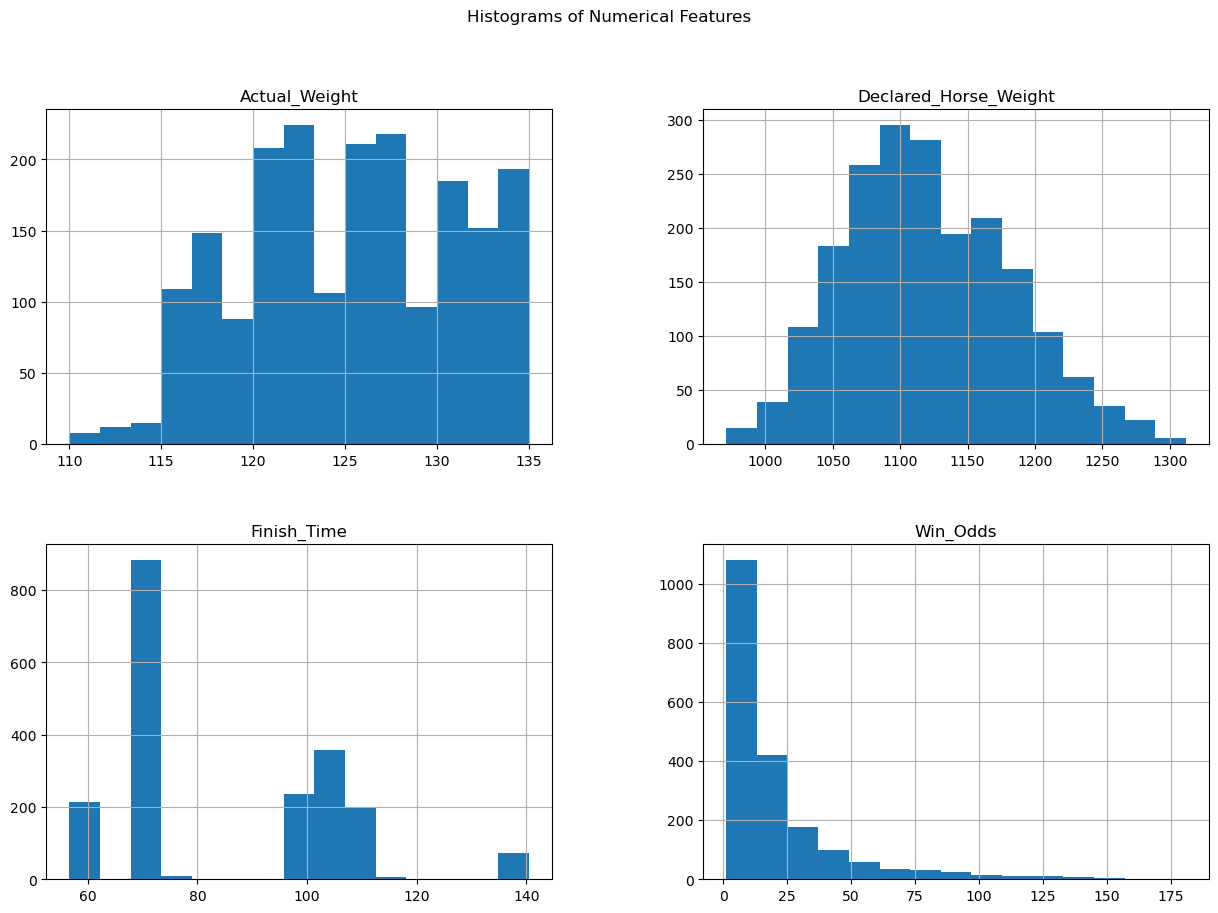

In [30]:
import matplotlib.pyplot as plt

# Plotting histograms for key numerical columns
df[['Actual_Weight', 'Declared_Horse_Weight', 'Finish_Time', 'Win_Odds']].hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()


<Figure size 1000x800 with 0 Axes>

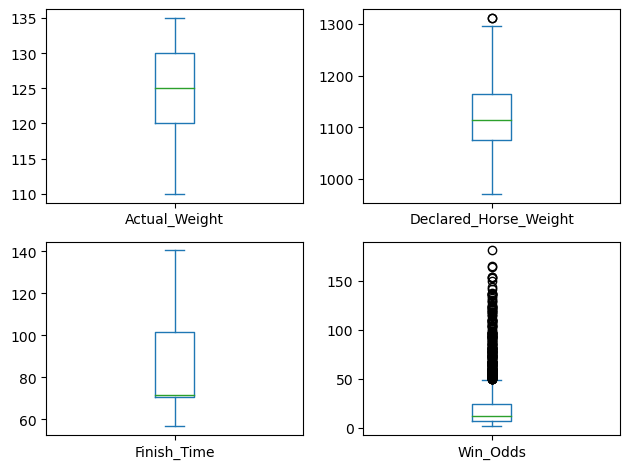

In [31]:
# Box plots for the same key numerical columns
plt.figure(figsize=(10, 8))
df[['Actual_Weight', 'Declared_Horse_Weight', 'Finish_Time', 'Win_Odds']].plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.tight_layout()
plt.show()


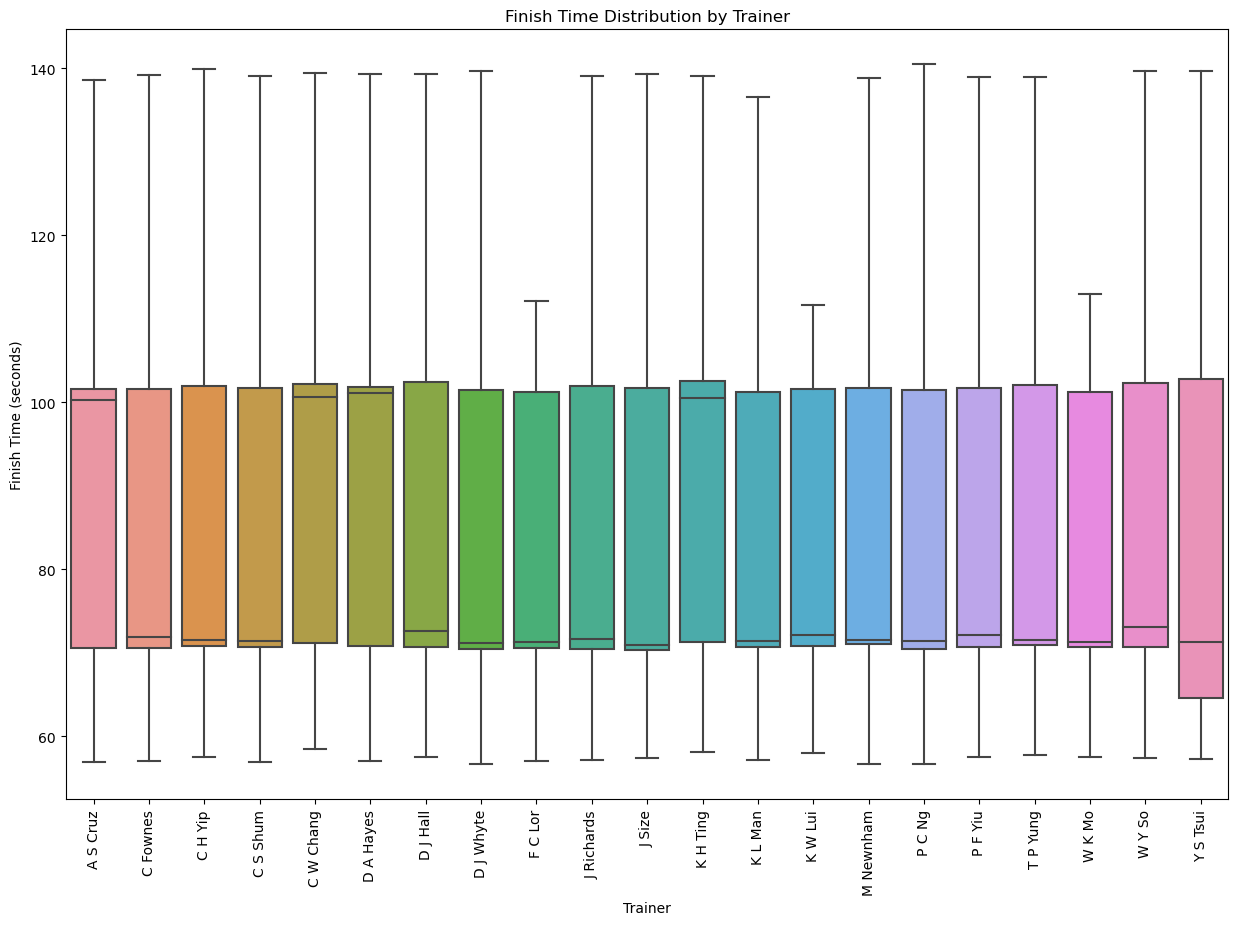

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the figure
plt.figure(figsize=(15, 10))

# Filtering out columns that start with 'Trainer_' and storing them in a list
trainer_columns = [col for col in df.columns if col.startswith('Trainer_')]

# Creating a DataFrame to store trainer names and corresponding finish times
trainer_finish_times = []

# Loop over each trainer column to gather finish times where the trainer's value is 1
for trainer in trainer_columns:
    # Creating a temporary DataFrame where the trainer's value is 1
    temp_df = df[df[trainer] == 1]
    for index, row in temp_df.iterrows():
        trainer_finish_times.append({'Trainer': trainer.split('_')[1], 'Finish Time': row['Finish_Time']})

# Converting list to DataFrame
trainer_finish_times_df = pd.DataFrame(trainer_finish_times)

# Creating the boxplot
sns.boxplot(x='Trainer', y='Finish Time', data=trainer_finish_times_df)
plt.xticks(rotation=90)  # Rotate the trainer names for better readability
plt.title('Finish Time Distribution by Trainer')
plt.xlabel('Trainer')
plt.ylabel('Finish Time (seconds)')
plt.show()

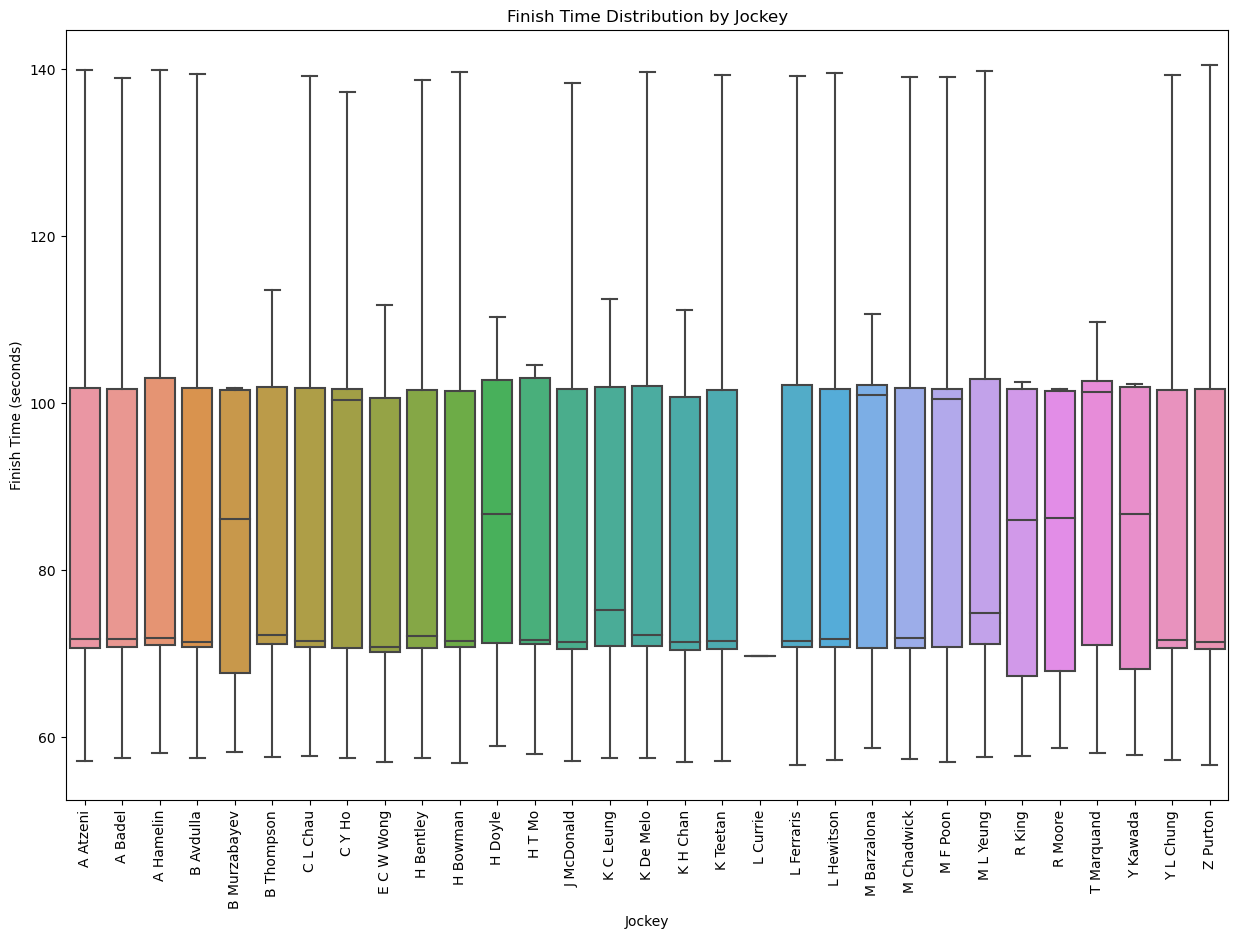

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the figure
plt.figure(figsize=(15, 10))

# Filtering out columns that start with 'Jockey_' and storing them in a list
jockey_columns = [col for col in df.columns if col.startswith('Jockey_')]

# Creating a DataFrame to store jockey names and corresponding finish times
jockey_finish_times = []

# Loop over each jockey column to gather finish times where the jockey's value is 1
for jockey in jockey_columns:
    # Creating a temporary DataFrame where the jockey's value is 1
    temp_df = df[df[jockey] == 1]
    for index, row in temp_df.iterrows():
        jockey_finish_times.append({'Jockey': jockey.split('_')[1], 'Finish Time': row['Finish_Time']})

# Converting list to DataFrame
jockey_finish_times_df = pd.DataFrame(jockey_finish_times)

# Creating the boxplot
sns.boxplot(x='Jockey', y='Finish Time', data=jockey_finish_times_df)
plt.xticks(rotation=90)  # Rotate the jockey names for better readability
plt.title('Finish Time Distribution by Jockey')
plt.xlabel('Jockey')
plt.ylabel('Finish Time (seconds)')
plt.show()

# Data Preparation and Splitting for Machine Learning Algorithms

In [34]:
import pandas as pd

# Load the one-hot encoded dataset
df_encoded = pd.read_csv('encoded_dataset.csv')

# Initialize columns to store the categorical data
df_encoded['Horse'] = ''
df_encoded['Trainer'] = ''
df_encoded['Jockey'] = ''

# Extract categorical data from one-hot encoded columns
for column in df_encoded.columns:
    if column.startswith('Horse_'):
        # Extract the horse name and assign it back to the 'Horse' column where the value is 1
        df_encoded.loc[df_encoded[column] == 1, 'Horse'] = column.split('_', 1)[1]
    elif column.startswith('Trainer_'):
        # Extract the trainer name and assign it back to the 'Trainer' column where the value is 1
        df_encoded.loc[df_encoded[column] == 1, 'Trainer'] = column.split('_', 1)[1]
    elif column.startswith('Jockey_'):
        # Extract the jockey name and assign it back to the 'Jockey' column where the value is 1
        df_encoded.loc[df_encoded[column] == 1, 'Jockey'] = column.split('_', 1)[1]

# Optionally, drop the one-hot encoded columns if they are no longer needed
cols_to_drop = [col for col in df_encoded.columns if col.startswith(('Horse_', 'Trainer_', 'Jockey_'))]
df_categorical = df_encoded.drop(columns=cols_to_drop)

# Save the resulting DataFrame with categorical data
df_categorical.to_csv('categorical_dataset.csv', index=False)


In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
df = pd.read_csv('encoded_dataset.csv')

# 'Place' is the target variable and it's already in numerical format
X = df.drop(['Place'], axis=1)  # Drop the target variable to get the features
y = df['Place']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Exploring Different Models

## Random Forest Classifier

In [36]:
# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict probabilities for each class (place)
y_prob = rf_classifier.predict_proba(X_test)

In [37]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Make predictions on the test set
predictions = rf_classifier.predict(X_test)

# Evaluate the model's performance
print("Classification Report:\n", classification_report(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
print("Accuracy Score:", accuracy_score(y_test, predictions))

# Perform cross-validation
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(rf_classifier, X, y, cv=5)
print("Cross-validation scores:", cross_val_scores)
print("Mean cross-validation score:", cross_val_scores.mean())

# Check feature importances
feature_importances = pd.DataFrame(rf_classifier.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print("Feature Importances:\n", feature_importances)


Classification Report:
               precision    recall  f1-score   support

           1       0.23      0.29      0.26        41
           2       0.07      0.14      0.09        29
           3       0.15      0.10      0.12        41
           4       0.05      0.06      0.06        32
           5       0.14      0.20      0.16        30
           6       0.15      0.11      0.13        36
           7       0.12      0.11      0.11        37
           8       0.20      0.18      0.19        33
           9       0.10      0.05      0.07        40
          10       0.07      0.09      0.08        23
          11       0.14      0.15      0.15        26
          12       0.44      0.15      0.22        27

    accuracy                           0.14       395
   macro avg       0.16      0.14      0.14       395
weighted avg       0.16      0.14      0.14       395

Confusion Matrix:
 [[12 13  3  4  3  1  3  1  1  0  0  0]
 [ 5  4  3  3  2  3  2  1  2  2  2  0]
 [11  6  4  

## Neural Network

In [38]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert target variable to one-hot encoding
y_train_encoded = tf.keras.utils.to_categorical(y_train - 1)  # 'Place' starts from 1
y_test_encoded = tf.keras.utils.to_categorical(y_test - 1)

# Model building
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(y_train_encoded.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model training
history = model.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Model evaluation
test_loss, test_acc = model.evaluate(X_test_scaled, y_test_encoded, verbose=2)
print(f"Test accuracy: {test_acc}")


Epoch 1/50


/Users/user/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0819 - loss: 2.7730 - val_accuracy: 0.0633 - val_loss: 2.5470
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1921 - loss: 2.3722 - val_accuracy: 0.0823 - val_loss: 2.5222
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2919 - loss: 2.1323 - val_accuracy: 0.0854 - val_loss: 2.5251
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4047 - loss: 1.8934 - val_accuracy: 0.1076 - val_loss: 2.5885
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5085 - loss: 1.6371 - val_accuracy: 0.1297 - val_loss: 2.6901
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5452 - loss: 1.4581 - val_accuracy: 0.1203 - val_loss: 2.8378
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5633 - loss: 1.2593 - val_accuracy: 0.1234 - val_loss: 3.0215
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5903 - loss: 1.1459 - val_accuracy: 0.1203 - val_loss: 3.1972
Epo

# Model Fine-Tuning and Revision

In [39]:
import pandas as pd

# Load the one-hot encoded dataset
df_encoded = pd.read_csv('encoded_dataset.csv')

# Initialize columns to store the categorical data
df_encoded['Horse'] = ''
df_encoded['Trainer'] = ''
df_encoded['Jockey'] = ''

# Extract categorical data from one-hot encoded columns
for column in df_encoded.columns:
    if column.startswith('Horse_'):
        # Extract the horse name and assign it back to the 'Horse' column where the value is 1
        df_encoded.loc[df_encoded[column] == 1, 'Horse'] = column.split('_', 1)[1]
    elif column.startswith('Trainer_'):
        # Extract the trainer name and assign it back to the 'Trainer' column where the value is 1
        df_encoded.loc[df_encoded[column] == 1, 'Trainer'] = column.split('_', 1)[1]
    elif column.startswith('Jockey_'):
        # Extract the jockey name and assign it back to the 'Jockey' column where the value is 1
        df_encoded.loc[df_encoded[column] == 1, 'Jockey'] = column.split('_', 1)[1]

# Drop the one-hot encoded columns if they are no longer needed
cols_to_drop = [col for col in df_encoded.columns if col.startswith(('Horse_', 'Trainer_', 'Jockey_'))]
df_categorical = df_encoded.drop(columns=cols_to_drop)

# Save the resulting DataFrame with categorical data
df_categorical.to_csv('categorical_dataset.csv', index=False)

In [40]:
df_categorical.head()

,Race_Number,Place,Actual_Weight,Declared_Horse_Weight,Draw_Position,Finish_Time,Win_Odds,Year,Month,Day,Horse,Trainer,Jockey
0,1,1,117,1100,3,57.60,5.3,2023,11,29,HAPPY HORSE(H061),K L Man,Y L Chung
1,1,2,123,1165,4,57.71,9.6,2023,11,29,GOODMANSHIP(E208),D J Whyte,L Ferraris
2,1,3,120,1085,5,57.87,3.1,2023,11,29,FIGHTING STAR(E255),C H Yip,K Teetan
3,1,4,129,1113,7,57.96,5.3,2023,11,29,STRIVE FOR GLORY(D186),W Y So,Z Purton
4,1,5,122,1107,6,57.96,8.0,2023,11,29,HAPPILY FRIENDS(C533),W Y So,J McDonald


### Assigning Distance Categories

In [41]:
import pandas as pd

# Load dataset
df = pd.read_csv('categorical_dataset.csv')

# Define the function to categorize race distances based on finishing times
def categorize_race_distance(finish_time):
    if 53 <= finish_time <= 63:
        return '1000'
    elif 67 <= finish_time <= 77:
        return '1200'
    elif 98 <= finish_time <= 106:
        return '1650'
    elif 107 <= finish_time <= 115:
        return '1800'
    elif 135 <= finish_time <= 143:
        return '2200'
    else:
        return 'Other'  # For times that don't fit any category

# Apply the function to create a new column
df['Race_Distance'] = df['Finish_Time'].apply(categorize_race_distance)

# Save the modified DataFrame back to CSV if needed
df.to_csv('modified_dataset.csv', index=False)

df.head()

,Race_Number,Place,Actual_Weight,Declared_Horse_Weight,Draw_Position,Finish_Time,Win_Odds,Year,Month,Day,Horse,Trainer,Jockey,Race_Distance
0,1,1,117,1100,3,57.60,5.3,2023,11,29,HAPPY HORSE(H061),K L Man,Y L Chung,1000
1,1,2,123,1165,4,57.71,9.6,2023,11,29,GOODMANSHIP(E208),D J Whyte,L Ferraris,1000
2,1,3,120,1085,5,57.87,3.1,2023,11,29,FIGHTING STAR(E255),C H Yip,K Teetan,1000
3,1,4,129,1113,7,57.96,5.3,2023,11,29,STRIVE FOR GLORY(D186),W Y So,Z Purton,1000
4,1,5,122,1107,6,57.96,8.0,2023,11,29,HAPPILY FRIENDS(C533),W Y So,J McDonald,1000


### Calculate Average Finishing Time and Win Rate

In [42]:
import pandas as pd

# Load cleaned dataset with categorical columns
df = pd.read_csv('modified_dataset.csv')

In [43]:
# Group by 'Horse' and 'Race_Distance' and calculate average finish time
horse_distance_stats = df.groupby(['Horse', 'Race_Distance']).agg(
    Horse_Avg_Finish_Time=('Finish_Time', lambda x: round(x.mean(), 2))  # Ensure finish time is rounded to two decimal places
).reset_index()

In [44]:
# Calculate average finish time for each jockey at each race distance, rounding to two decimals
jockey_stats = df.groupby(['Jockey', 'Race_Distance']).agg(
    Jockey_Avg_Finish_Time=('Finish_Time', lambda x: round(x.mean(), 2))
).reset_index()

In [45]:
# Calculate average finish time for each trainer at each race distance, rounding to two decimals
trainer_stats = df.groupby(['Trainer', 'Race_Distance']).agg(
    Trainer_Avg_Finish_Time=('Finish_Time', lambda x: round(x.mean(), 2))
).reset_index()

In [46]:
# Merge the horse stats back to the main DataFrame
df = df.merge(horse_distance_stats, on=['Horse', 'Race_Distance'], how='left')

# Merge the jockey stats back to the main DataFrame
df = df.merge(jockey_stats, on=['Jockey', 'Race_Distance'], how='left')

# Merge the trainer stats back to the main DataFrame
df = df.merge(trainer_stats, on=['Trainer', 'Race_Distance'], how='left')

In [47]:
# Function to calculate win rate and round to two decimal places
def calculate_win_rate(group):
    return round((group == 1).mean(), 2)

In [48]:
# Group by 'Horse' and calculate win rate
horse_win_rate = df.groupby('Horse')['Place'].apply(calculate_win_rate).reset_index(name='Horse_Win_Rate')

In [49]:
# Group by 'Jockey' and calculate win rate
jockey_win_rate = df.groupby('Jockey')['Place'].apply(calculate_win_rate).reset_index(name='Jockey_Win_Rate')

In [50]:
# Group by 'Trainer' and calculate win rate
trainer_win_rate = df.groupby('Trainer')['Place'].apply(calculate_win_rate).reset_index(name='Trainer_Win_Rate')

### Merge the Aggregated Data with Main DataFrame


In [51]:
# Merge the win rates back to the main DataFrame
df = df.merge(horse_win_rate, on='Horse', how='left')
df = df.merge(jockey_win_rate, on='Jockey', how='left')
df = df.merge(trainer_win_rate, on='Trainer', how='left')

In [52]:
# Save the updated DataFrame back to CSV if needed
df.to_csv('updated_dataset.csv', index=False)

df.head()

,Race_Number,Place,Actual_Weight,Declared_Horse_Weight,Draw_Position,Finish_Time,Win_Odds,Year,Month,Day,Horse,Trainer,Jockey,Race_Distance,Horse_Avg_Finish_Time,Jockey_Avg_Finish_Time,Trainer_Avg_Finish_Time,Horse_Win_Rate,Jockey_Win_Rate,Trainer_Win_Rate
0,1,1,117,1100,3,57.60,5.3,2023,11,29,HAPPY HORSE(H061),K L Man,Y L Chung,1000,57.72,57.77,57.85,0.5,0.07,0.07
1,1,2,123,1165,4,57.71,9.6,2023,11,29,GOODMANSHIP(E208),D J Whyte,L Ferraris,1000,58.10,57.67,57.57,0.0,0.09,0.10
2,1,3,120,1085,5,57.87,3.1,2023,11,29,FIGHTING STAR(E255),C H Yip,K Teetan,1000,57.87,57.88,57.88,0.0,0.11,0.04
3,1,4,129,1113,7,57.96,5.3,2023,11,29,STRIVE FOR GLORY(D186),W Y So,Z Purton,1000,58.20,57.80,57.91,0.0,0.18,0.07
4,1,5,122,1107,6,57.96,8.0,2023,11,29,HAPPILY FRIENDS(C533),W Y So,J McDonald,1000,57.96,57.92,57.91,0.0,0.14,0.07


### Re-encoding the Data

In [53]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
df = pd.read_csv('fully_encoded_dataset.csv')

# Convert Year, Month, and Day into a single datetime column for easier sorting
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# Sort the dataframe by date to ensure correct temporal splitting
df.sort_values('Date', inplace=True)

# Encode categorical variables using LabelEncoder
encoder_horse = LabelEncoder()
encoder_trainer = LabelEncoder()
encoder_jockey = LabelEncoder()

# Fit the encoders to categorical data for the full dataset before the split
df['Horse'] = encoder_horse.fit_transform(df['Horse'])
df['Trainer'] = encoder_trainer.fit_transform(df['Trainer'])
df['Jockey'] = encoder_jockey.fit_transform(df['Jockey'])


# Save the fully encoded dataset
df.to_csv('fully_encoded_dataset.csv', index=False)

print("Encoding complete. The dataset is now saved as 'fully_encoded_dataset.csv'.")

Encoding complete. The dataset is now saved as 'fully_encoded_dataset.csv'.


### Saving the Label Encoder for 'Horse', 'Trainer' and 'Jockey' for Future Use

In [54]:
import pickle

# Save the horse encoder
with open('horse_encoder.pkl', 'wb') as file:
    pickle.dump(encoder_horse, file)

# Save the trainer encoder
with open('trainer_encoder.pkl', 'wb') as file:
    pickle.dump(encoder_trainer, file)

# Save the jockey encoder
with open('jockey_encoder.pkl', 'wb') as file:
    pickle.dump(encoder_jockey, file)

### Re-splitting the Data

In [55]:
import pandas as pd

# Load the dataset
df = pd.read_csv('fully_encoded_dataset.csv')

# Convert Year, Month, and Day into a single datetime column for easier sorting
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# Sort the dataframe by date to ensure correct temporal splitting
df.sort_values('Date', inplace=True)

# Calculate the split index for 80/20 split with the most recent dates as test data
split_index = int(len(df) * 0.8)

# Split the data into training and testing sets
train_df = df.iloc[:split_index]
test_df = df.iloc[split_index:]

# Drop the 'Date' column if it's not used as a feature in the model
train_df = train_df.drop(columns=['Date'])
test_df = test_df.drop(columns=['Date'])

# Save the split data
train_df.to_csv('train_dataset.csv', index=False)
test_df.to_csv('test_dataset.csv', index=False)

print("Data splitting completed. Training and test sets saved.")

Data splitting completed. Training and test sets saved.


## Random Forest Classifier with Revised DataFrame

In [56]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

# Load the training and testing datasets
train_df = pd.read_csv('train_dataset.csv')
test_df = pd.read_csv('test_dataset.csv')

# Separate the features and target variable
X_train = train_df.drop('Place', axis=1)  # Drop the target variable to get the features
y_train = train_df['Place']  # Target variable

X_test = test_df.drop('Place', axis=1)  # Drop the target variable to get the features
y_test = test_df['Place']  # Target variable

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

# Feature Importances
feature_importances = pd.DataFrame(rf_classifier.feature_importances_,
                                   index=X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print("Feature Importances:")
print(feature_importances.head(10))


Classification Report:
              precision    recall  f1-score   support

           1       0.32      0.66      0.43        35
           2       0.13      0.14      0.14        36
           3       0.21      0.18      0.19        34
           4       0.18      0.15      0.16        33
           5       0.09      0.09      0.09        34
           6       0.12      0.12      0.12        33
           7       0.07      0.06      0.06        35
           8       0.21      0.18      0.19        34
           9       0.19      0.15      0.16        34
          10       0.10      0.09      0.10        33
          11       0.26      0.27      0.26        30
          12       0.19      0.12      0.15        24

    accuracy                           0.18       395
   macro avg       0.17      0.18      0.17       395
weighted avg       0.17      0.18      0.17       395

Confusion Matrix:
[[23  4  2  0  3  0  1  2  0  0  0  0]
 [13  5  1  7  3  2  0  1  1  1  2  0]
 [ 7  9  6  2 

## Neural Network with Revised DataFrame

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the datasets
train_df = pd.read_csv('train_dataset.csv')
test_df = pd.read_csv('test_dataset.csv')

# Separate the features and target variable
X_train = train_df.drop('Place', axis=1)
y_train = train_df['Place']
X_test = test_df.drop('Place', axis=1)
y_test = test_df['Place']

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model architecture
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # For regression. Use 'softmax' for classification.

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])  # For regression
# For classification: loss='sparse_categorical_crossentropy', metrics=['accuracy']

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')


Epoch 1/50


/Users/user/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 45.7908 - mae: 5.8312 - val_loss: 18.3763 - val_mae: 3.5290
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - loss: 13.3674 - mae: 3.0450 - val_loss: 10.4997 - val_mae: 2.7340
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - loss: 9.4974 - mae: 2.5958 - val_loss: 9.6813 - val_mae: 2.6121
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - loss: 8.4097 - mae: 2.4101 - val_loss: 9.6645 - val_mae: 2.5830
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - loss: 8.2768 - mae: 2.3942 - val_loss: 9.3373 - val_mae: 2.5490
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - loss: 8.0961 - mae: 2.3819 - val_loss: 9.1653 - val_mae: 2.5207
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - loss: 8.1852 - mae: 2.3729 - val_loss: 9.1355 - val_mae: 2.5124
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - loss: 8.2650 - mae: 2.3880 - val_loss: 9.0166 - val_mae: 2.4883
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - loss: 7.930